In [1]:
import time
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ticker_list = ["MCD", "DRI","BJRI", "PEP", "RUTH"]

precovid = int(time.mktime(datetime.datetime(2015, 1, 1, 23, 59).timetuple()))
postcovid = int(time.mktime(datetime.datetime(2023, 1, 1, 23, 59).timetuple()))
interval = "1wk"
stock_df = pd.DataFrame()
 

for ticker in ticker_list:
    query_string = f"https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={precovid}&period2={postcovid}&interval={interval}&events=history&includeAdjustedClose=true"
    loop_df= pd.read_csv(query_string)  
    loop_df = loop_df [["Date","Close","Volume"]]
    loop_df = loop_df.rename(columns={'Close': f'Close {ticker}', 'Volume': f'Volume {ticker}'})
    stock_df =  pd.concat([stock_df,loop_df], axis = 1)
    
stock_df = stock_df.loc[:,~stock_df.columns.duplicated()].copy()
display(stock_df)

,Date,Close MCD,Volume MCD,Close DRI,Volume DRI,Close BJRI,Volume BJRI,Close PEP,Volume PEP,Close RUTH,Volume RUTH
0,2015-01-01,94.010002,25116000,53.803841,6909609,49.509998,1340900,95.739998,22708000,14.520000,1146109
1,2015-01-08,91.540001,27466300,52.990391,9097215,48.369999,1458100,96.669998,25884900,15.320000,1600169
2,2015-01-15,90.339996,28314000,53.312195,7381250,45.509998,2310400,97.400002,20889000,14.910000,753619
3,2015-01-22,88.779999,40347800,54.277607,6656337,45.610001,1641900,95.720001,30422200,14.800000,728585
4,2015-01-29,94.050003,52121500,54.223972,9504306,45.279999,1562300,96.599998,29386400,14.960000,884751
...,...,...,...,...,...,...,...,...,...,...,...
413,2022-12-01,270.339996,14333400,142.210007,4817000,28.920000,1133700,182.179993,22391000,16.450001,1713381
414,2022-12-08,274.529999,13981600,143.949997,6331000,29.650000,1413900,183.360001,22635700,16.110001,3058411
415,2022-12-15,268.160004,14981000,138.550003,9559900,27.370001,1430700,182.500000,33769600,14.940000,3396087
416,2022-12-22,265.109985,6738200,138.820007,3224300,26.410000,676300,181.750000,12241800,15.160000,1325680


In [3]:
#covid start dec 5 2019 or index 257(covidstart = stock_df.loc[stock_df ['Date'] == '2019-12-05'] )
precovid_df = stock_df.iloc[0:256]
postcovid_df = stock_df.iloc[257:417]

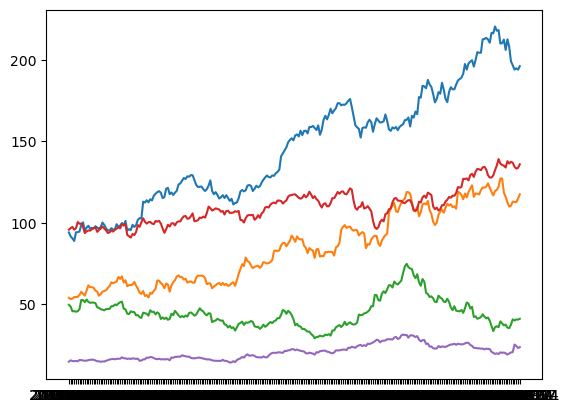

In [4]:
plt.plot(precovid_df['Date'], precovid_df['Close MCD'])
plt.plot(precovid_df['Date'], precovid_df['Close DRI'])
plt.plot(precovid_df['Date'], precovid_df['Close BJRI'])
plt.plot(precovid_df['Date'], precovid_df['Close PEP'])
plt.plot(precovid_df['Date'], precovid_df['Close RUTH'])


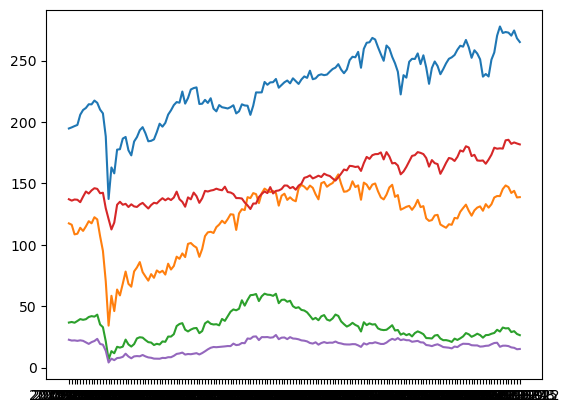

In [5]:
plt.plot(postcovid_df['Date'], postcovid_df['Close MCD'])
plt.plot(postcovid_df['Date'], postcovid_df['Close DRI'])
plt.plot(postcovid_df['Date'], postcovid_df['Close BJRI'])
plt.plot(postcovid_df['Date'], postcovid_df['Close PEP'])
plt.plot(postcovid_df['Date'], postcovid_df['Close RUTH'])

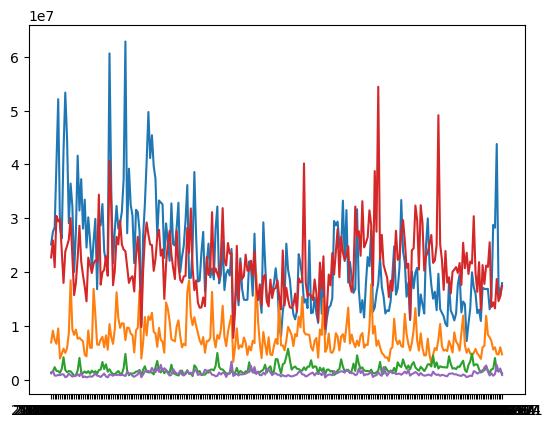

In [6]:
plt.plot(precovid_df['Date'], precovid_df['Volume MCD'])
plt.plot(precovid_df['Date'], precovid_df['Volume DRI'])
plt.plot(precovid_df['Date'], precovid_df['Volume BJRI'])
plt.plot(precovid_df['Date'], precovid_df['Volume PEP'])
plt.plot(precovid_df['Date'], precovid_df['Volume RUTH'])

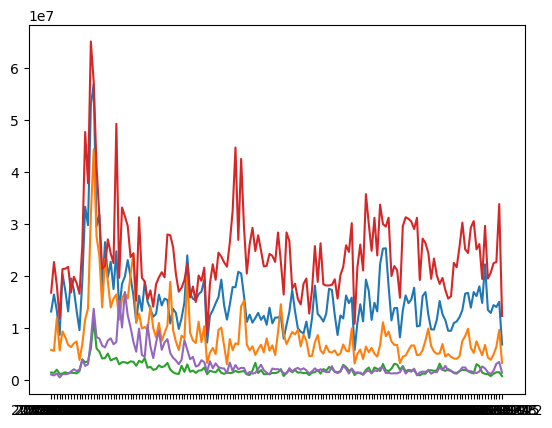

In [7]:
plt.plot(postcovid_df['Date'], postcovid_df['Volume MCD'])
plt.plot(postcovid_df['Date'], postcovid_df['Volume DRI'])
plt.plot(postcovid_df['Date'], postcovid_df['Volume BJRI'])
plt.plot(postcovid_df['Date'], postcovid_df['Volume PEP'])
plt.plot(postcovid_df['Date'], postcovid_df['Volume RUTH'])